In [1]:
# import various packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import figure
%config InlineBackend.figure_format = 'svg'
rc = {'font.family': 'serif',
      'font.serif': 'Times New Roman',
      'font.variant': 'normal',
      'font.weight':  'normal',
      'font.stretch': 'normal',
      'font.style': 'normal',
      'font.size':    12.0,
      'mathtext.default': 'regular',
      'mathtext.fontset': 'stix'}
plt.rcParams.update(rc)

In [7]:
def e_1(d, beta, c):
    return 0.5*((d*np.sin(beta) - c)/(1 - np.sin(beta)))


def e_2(D, beta, c):
    return 0.5*(D*np.sin(beta) - c)


def S_a(z):
    return np.pi*(d + 2*z)*(l_gr - a - z)


def S_b(z):
    if z > z_1:
        return 0
    else:
        return n*(beta - fi_1(z))*(d + 2*z)*a


def fi_1(z):
    return np.arcsin((c + 2*z)/(d + 2*z))


def S_c(z):
    if z >= 0 and z <= z_1:
        return 2*n*a*b1(z)
    elif z_1 < z and z <= z_2:
        return 2*n*a*b2(z)
    elif z > z_2:
        return 0


def b1(z):
    return 0.5*(np.sqrt(D_ks**2 - (c + 2*z)**2) - np.sqrt((d + 2*z)**2 - (c + 2*z)**2))


def b2(z):
    return 0.5*(np.sqrt(D_ks**2 - (c + z*2)**2) - (c + 2*z)*np.tan(beta)**(-1))


def S_d(z):
    return np.pi/4*(D_ks**2 - (d + 2*z)**2)


def S(z):
    print(S_a(z),S_b(z),S_c(z),S_d(z))
    return S_a(z) + S_b(z) + S_c(z) + S_d(z)

In [24]:
ro_t = 1603
omega = 818.161
D_ks = np.round(0.61-2*0.0049655791913236925-2*0.001, 4)
e_d = 0.6756387565265353
z_0 = e_d * D_ks / 2
d = D_ks - 2 * z_0
n = 4

beta = np.pi/n
F_ks = np.pi*(D_ks**2)/4
c_ = 0.05
d_ = d / D_ks
a_ = 0.3

epsilon_f = 1 - d_**2
f_cut = (n/np.pi) * (c_*np.sqrt(1 - c_**2) - c_*np.sqrt(d_ **
                                                        2 - c_**2) + np.arcsin(c_) - d_**2 * np.arcsin(c_/d_))
epsilon_w = epsilon_f - a_*f_cut
F_cut = F_ks*f_cut
# длина заряда
l_gr = omega/(ro_t * epsilon_w * F_ks)

a = a_ * l_gr
c = c_ * D_ks

e1 = e_1(d, beta, c)
e2 = e_2(D_ks, beta, c)

z_1 = 0.5*(d*np.sin(beta)-c)/(1-np.sin(beta))
z_2 = (D_ks*np.sin(beta)-c)/2
print(d,a,l_gr, D_ks)

0.19400045972147922 0.6271836830116717 2.0906122767055724 0.5981


In [25]:
z = np.linspace(0, z_0, 100)
sa = np.array([S_a(zx) for zx in z ])
sb = np.array([S_b(zx) for zx in z ])
sc = np.array([S_c(zx) for zx in z ])
sd = np.array([S_d(zx) for zx in z ])
s = np.array([S(zx) for zx in z ])

0.8919164382542885 0.30692584892664565 1.0177189696324007 0.2513960809271234
0.9094125181288973 0.3046046318696871 1.0084832629212155 0.2501391229460573
0.9268562552944558 0.3022574498772887 0.9993288435148199 0.248855993610466
0.9442476497509639 0.2998832076007538 0.9902479635623808 0.2475466929203496
0.9615867014984217 0.2974810289954501 0.9812334897625516 0.24621122087570801
0.9788734105368293 0.29505022331231306 0.9722788342400546 0.2448495774765412
0.9961077768661861 0.2925902567136187 0.9633778949309774 0.2434617627228493
1.013289800486493 0.29010072848423996 0.9545250039213095 0.2420477766146322
1.0304194813977494 0.28758135101765936 0.945714882475019 0.24060761915188997
1.0474968195999557 0.2850319329179136 0.9369426017183493 0.23914129033462253
1.0645218150931113 0.2824523646855265 0.9282035481302432 0.23764879016282994
1.0814944678772167 0.27984260655557736 0.9194933931355206 0.23613011863651218
1.098414777952272 0.27720267813550437 0.9108080662156808 0.23458527575566926
1.11

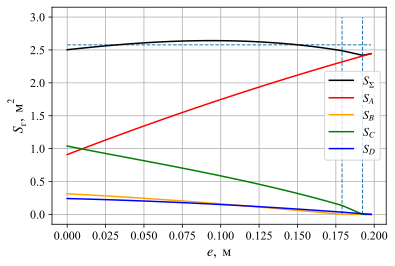

In [5]:
fig = plt.figure()
fig.patch.set_facecolor('white')
#plt.ylim([0, 0.7])
plt.plot(z, s, label='$\mathit{S}_{\mathrm{Σ}}$', color='black')
plt.plot(z, sa, label='$\mathit{S_A}$', color='r')
plt.plot(z, sb, label='$\mathit{S_B}$', color='orange')
plt.plot(z, sc, label='$\mathit{S_C}$', color='g')
plt.plot(z, sd, label='$\mathit{S_D}$', color='b')

plt.hlines(s.mean(), xmin=0, xmax=z_0, linestyle='--', linewidth=1)
# plt.hlines([s[-1], s[-1]], xmin=0, xmax=z_0, linestyle='--', linewidth=1)
plt.vlines(z_1, ymin=0, ymax=3, linestyle='--', linewidth=1)
plt.vlines(z_2, ymin=0, ymax=3, linestyle='--', linewidth=1)

plt.xlabel('$\mathit{e},$ $м$', fontsize =14)
plt.ylabel('$\mathit{S}_г,$ $м^2$', fontsize =14)
#plt.xlim(0, z_0)
#plt.ylim(0, 0.7)
plt.legend(loc='best')
plt.grid()
# plt.savefig(f'S_g(e).png', dpi =300, bbox_inches='tight')
plt.show()

In [6]:
S_g_sr = omega / ro_t / z_0
kappa_kan = (sa + sb) / (F_ks * (1 - epsilon_f))
kappa_cut = sc / (F_ks * f_cut)
print("a =", a)
print("c =", c)
print("D_ks =", D_ks)
print("d =", d)
print("e_0 =", z_0)
print("f_cut =", f_cut)
print("epsilon_f =", epsilon_f)
print("epsilon_w =", epsilon_w)
print("kappa_kan_0 =", kappa_kan[0])
print("kappa_cut_0 =", kappa_cut[0])
print("l_gr =", l_gr)
print("S_sr =", s.mean())
# print(S_g_sr)

a = 0.6540788379211082
c = 0.02928
D_ks = 0.5856
d = 0.18973439999999997
e_0 = 0.19793280000000002
f_cut = 0.08618225126912817
epsilon_f = 0.895024
epsilon_w = 0.8691693246192616
kappa_kan_0 = 43.244214371277046
kappa_cut_0 = 44.79346652447614
l_gr = 2.180262793070361
S_sr = 2.5775741998075214
